<a href="https://colab.research.google.com/github/elyahyaouiabdenasser/ML-Project/blob/master/ICCN_INPT_Projet_ML_groupe_elkhattari_%26_el_yahyaoui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
from scipy.io import loadmat
data_path1='/content/drive/My Drive/notre base de données/'
print("Loading data training set")        
dataset =loadmat('/content/drive/My Drive/notre base de données/' + 'trainingset.mat')
X = dataset['trainset']
y = dataset['traintarget']

Loading data training set


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train1,X_test,y_train1,y_test=train_test_split(X,y,test_size=0.2)
X_train,X_val,y_train,y_val=train_test_split(X_train1,y_train1,test_size=0.1)

In [0]:

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow import keras


In [0]:
from tensorflow.keras import layers
#notre model est vide mtn qu'on va le remplir
model = tf.keras.Sequential()
#input_dim nbr de variable en entré 
model.add(layers.Dense(128,activation="relu"))
#par default l'entré 
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(4,activation="relu"))

In [0]:
#accurancy=nbr correct  des predictions sur le nbr total

model.compile(loss="binary_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [20]:
#batc_size = le lot qui contient les element à traiter à la fois 
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=60,batch_size=100)
#_,acc=model.evaluate(X,y

Epoch 1/60
101/101 [==============================] - 3s 30ms/step - loss: 2.0247 - accuracy: 0.2315 - val_loss: 1.7016 - val_accuracy: 0.2574
Epoch 2/60
101/101 [==============================] - 3s 28ms/step - loss: 1.6061 - accuracy: 0.3166 - val_loss: 1.5829 - val_accuracy: 0.3148
Epoch 3/60
101/101 [==============================] - 3s 29ms/step - loss: 1.4943 - accuracy: 0.3490 - val_loss: 1.5589 - val_accuracy: 0.3121
Epoch 4/60
101/101 [==============================] - 3s 28ms/step - loss: 1.5229 - accuracy: 0.3597 - val_loss: 1.5906 - val_accuracy: 0.3318
Epoch 5/60
101/101 [==============================] - 3s 29ms/step - loss: 1.9949 - accuracy: 0.2808 - val_loss: 2.2749 - val_accuracy: 0.1910
Epoch 6/60
101/101 [==============================] - 3s 29ms/step - loss: 2.5279 - accuracy: 0.2050 - val_loss: 2.4174 - val_accuracy: 0.1991
Epoch 7/60
101/101 [==============================] - 3s 29ms/step - loss: 2.4133 - accuracy: 0.2408 - val_loss: 2.3289 - val_accuracy: 0.2233

In [21]:

# The returned "history" object holds a record of the loss values and metric values during training
print('\nhistory dict:', history.history)

# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test, batch_size=128)
print('test loss, test acc:', results)
#prediction 
#model.predict(X_val)


history dict: {'loss': [2.024696111679077, 1.6061407327651978, 1.494309663772583, 1.5228732824325562, 1.9949424266815186, 2.5279364585876465, 2.413339138031006, 2.3155031204223633, 2.3521199226379395, 2.344094753265381, 2.1614534854888916, 2.142942428588867, 2.1442012786865234, 2.115006685256958, 2.070166826248169, 2.062809705734253, 2.0236711502075195, 2.096367597579956, 3.5918712615966797, 4.8010478019714355, 4.788081645965576, 4.789156913757324, 4.790218830108643, 4.7912917137146, 4.805382251739502, 4.794554233551025, 4.795650959014893, 4.792393207550049, 4.796713352203369, 4.788082599639893, 4.790230751037598, 4.796726703643799, 4.7988996505737305, 4.802110195159912, 4.789156913757324, 4.795663833618164, 4.8021464347839355, 4.794564723968506, 4.7902302742004395, 4.791304588317871, 4.791328430175781, 4.789156913757324, 4.7978129386901855, 4.793464660644531, 4.796700954437256, 4.796713829040527, 4.790242671966553, 4.790254592895508, 4.791316509246826, 4.795652389526367, 4.7945537567

Text(0.5, 1.0, 'Accuracy Curves')

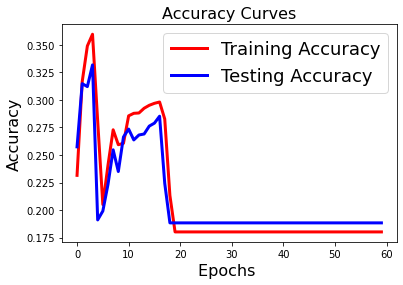

In [22]:
#Tracer  la courbe   Accuracy du model pour training et testing 
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],'r',linewidth=3.0, label='Training Accuracy')
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0, label='Testing Accuracy')
plt.legend(fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

Text(0.5, 1.0, 'Loss Curves')

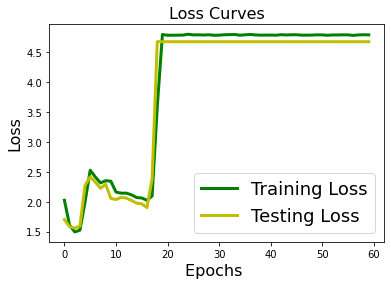

In [23]:
# #Tracer  la courbe   de la fonction de perte du model pour training et testing 
plt.plot(history.history['loss'], 'g', linewidth=3.0, label='Training Loss')
plt.plot(history.history['val_loss'], 'y', linewidth=3.0, label='Testing Loss')
plt.legend(fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)